In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

churn_data = pd.read_csv('churn_clean.csv', usecols = ['Tenure', 'MonthlyCharge'])
churn_data.head()

,Tenure,MonthlyCharge
0,6.795513,172.455519
1,1.156681,242.632554
2,15.754144,159.947583
3,17.087227,119.956840
4,1.670972,149.948316


<AxesSubplot:xlabel='Tenure', ylabel='MonthlyCharge'>

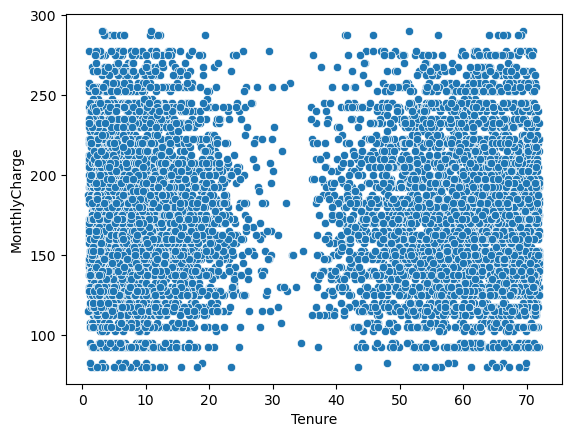

In [2]:
churn_data = churn_data.dropna()
sns.scatterplot(data = churn_data, x = 'Tenure', y = 'MonthlyCharge')

In [3]:
churn_norm = preprocessing.normalize(churn_data)


In [4]:
K = range(2, 10)
fits = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k).fit(churn_norm)
    
    # append the model to fits
    fits.append(model.inertia_)
    



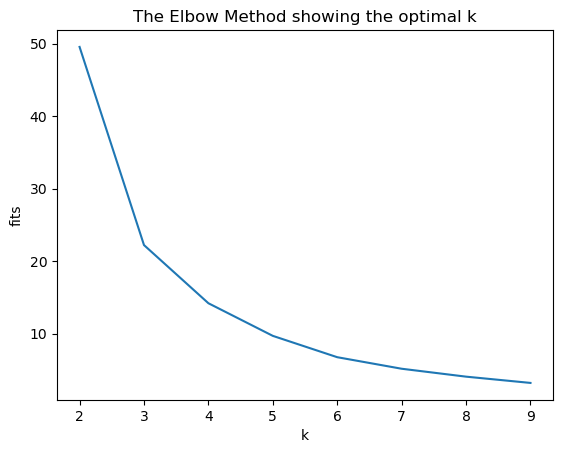

In [5]:

plt.plot(K, fits)
plt.xlabel('k')
plt.ylabel('fits')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(churn_norm)

KMeans(n_clusters=3)

In [7]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
churn_data['clusters'] = kmeans.labels_
churn_data

,Tenure,MonthlyCharge,clusters
0,6.795513,172.455519,0
1,1.156681,242.632554,0
2,15.754144,159.947583,0
3,17.087227,119.956840,0
4,1.670972,149.948316,0
...,...,...,...
9995,68.197130,159.979400,2
9996,61.040370,207.481100,1
9997,47.416890,169.974100,1
9998,71.095600,252.624000,1


In [9]:
ten1=churn_data.loc[churn_data['clusters'] == 1, 'Tenure'].mean()
ten0=churn_data.loc[churn_data['clusters'] == 0, 'Tenure'].mean()
ten2=churn_data.loc[churn_data['clusters'] == 2, 'Tenure'].mean()

mon1=churn_data.loc[churn_data['clusters'] == 1, 'MonthlyCharge'].mean()
mon0=churn_data.loc[churn_data['clusters'] == 0, 'MonthlyCharge'].mean()
mon2=churn_data.loc[churn_data['clusters'] == 2, 'MonthlyCharge'].mean()

print(ten1,' ',ten0,' ',ten2)
print(mon1,' ',mon0,' ',mon2)

56.61669722731535   9.095005929397901   63.85162003499995
193.87067071611426   174.18840345992365   136.3845330349997


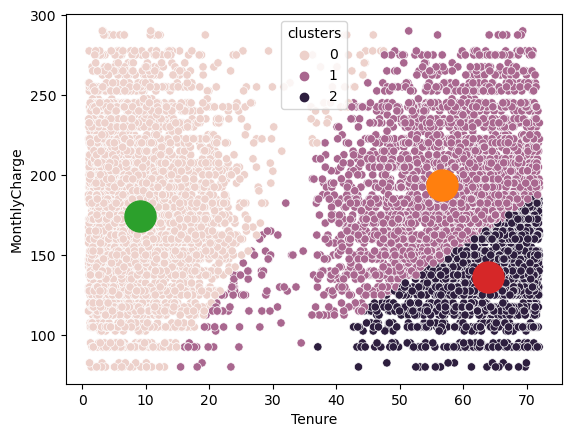

In [10]:

ax = sns.scatterplot(data = churn_data, x = 'Tenure', y = 'MonthlyCharge',hue='clusters')

ax = plt.scatter(ten1, mon1, marker='o', s=500)
ax = plt.scatter(ten0, mon0, marker='o', s=500)
ax = plt.scatter(ten2, mon2, marker='o', s=500)

In [11]:

silhouette_score(churn_norm, kmeans.labels_, metric='euclidean')

0.6779152415030651

In [12]:
kmeans.cluster_centers_


array([[0.05427968, 0.99784919],
       [0.28391888, 0.95757162],
       [0.42874177, 0.9011883 ]])

In [14]:
churn_data.to_csv("clean_d212.csv")